# Calculate Sales Profit

# Import Lib 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PreProcessing

In [2]:
Sales = pd.read_csv('Sales Data.csv')

In [3]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index             185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [4]:
Sales['Month'] = Sales['Month'].astype(object)

In [5]:
Sales['Order Date']= pd.to_datetime(Sales['Order Date'])
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Index             185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  object        
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 15.6+ MB


In [6]:
Sales.head()

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
Sales.isna().sum()

Index               0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [8]:
Sales.duplicated().sum()

0

In [9]:
Sales[['Price Each','Sales']].describe().round(2)

,Price Each,Sales
count,185950.00,185950.00
mean,184.40,185.49
std,332.73,332.92
min,2.99,2.99
25%,11.95,11.95
50%,14.95,14.95
75%,150.00,150.00
max,1700.00,3400.00


In [10]:
Sales['Product'].nunique()

19

# EDA Process

In [11]:
Sales.sample(9)

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
66409,11198,172706,Apple Airpods Headphones,1,150.00,2019-03-14 14:33:00,"462 5th St, San Francisco, CA 94016",3,150.00,San Francisco,14
99160,233,279016,Apple Airpods Headphones,1,150.00,2019-11-20 12:05:00,"564 North St, Atlanta, GA 30301",11,150.00,Atlanta,12
41261,16355,192161,AAA Batteries (4-pack),1,2.99,2019-04-01 13:32:00,"603 7th St, Portland, OR 97035",4,2.99,Portland,13
169642,11607,234016,AAA Batteries (4-pack),2,2.99,2019-07-29 11:42:00,"762 Lake St, Los Angeles, CA 90001",7,5.98,Los Angeles,11
165057,6999,229601,AAA Batteries (4-pack),1,2.99,2019-07-26 19:11:00,"58 Hill St, Portland, OR 97035",7,2.99,Portland,19
34422,9476,185605,Bose SoundSport Headphones,1,99.99,2019-04-15 17:35:00,"904 Jackson St, Atlanta, GA 30301",4,99.99,Atlanta,17
3966,3987,299457,Apple Airpods Headphones,1,150.00,2019-12-16 13:06:00,"399 Cedar St, New York City, NY 10001",12,150.00,New York City,13
16888,16972,311887,Bose SoundSport Headphones,1,99.99,2019-12-19 10:04:00,"498 Elm St, San Francisco, CA 94016",12,99.99,San Francisco,10
179742,7386,216957,Apple Airpods Headphones,1,150.00,2019-06-23 14:55:00,"470 Highland St, San Francisco, CA 94016",6,150.00,San Francisco,14


In [12]:
Sales['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [13]:
Sales['Product'].nunique()

19

In [14]:
## count the total orders

len(Sales['Product'])

185950

In [15]:
## get the profit

Sales['Gross profit']= Sales['Sales']-Sales['Price Each']

In [16]:
Sales['Gross profit'].sum().round(2)

202905.29

In [17]:
## get the Revenue

Sales['Revenue']= Sales['Price Each']* Sales['Quantity Ordered']

In [18]:
Sales['Revenue'].sum()

34492035.97

In [19]:
Sales['Profit_percentage'] = (Sales['Sales']-Sales['Price Each'])/Sales['Sales']

In [20]:
Sales['Profit_percentage'].value_counts()

0.000000    168552
0.500000     13324
0.666667      2666
0.750000       787
0.666667       254
0.800000       167
0.833333        79
0.800000        69
0.857143        24
0.750000        19
0.875000         5
0.888889         3
0.833333         1
Name: Profit_percentage, dtype: int64

In [21]:
Sales.sample(10)

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Gross profit,Revenue,Profit_percentage
147321,850,248970,AAA Batteries (4-pack),2,2.99,2019-09-17 01:41:00,"746 Johnson St, Atlanta, GA 30301",9,5.98,Atlanta,1,2.99,5.98,0.5
7074,7110,302451,Apple Airpods Headphones,1,150.00,2019-12-02 12:53:00,"707 Cedar St, San Francisco, CA 94016",12,150.00,San Francisco,12,0.00,150.00,0.0
111088,12214,290460,Bose SoundSport Headphones,1,99.99,2019-11-08 06:51:00,"163 South St, San Francisco, CA 94016",11,99.99,San Francisco,6,0.00,99.99,0.0
82073,11709,247867,Apple Airpods Headphones,1,150.00,2019-08-17 14:06:00,"796 Willow St, San Francisco, CA 94016",8,150.00,San Francisco,14,0.00,150.00,0.0
123478,7001,266044,AAA Batteries (4-pack),1,2.99,2019-10-02 09:23:00,"619 Park St, San Francisco, CA 94016",10,2.99,San Francisco,9,0.00,2.99,0.0
112751,13885,292064,Lightning Charging Cable,1,14.95,2019-11-24 23:07:00,"839 13th St, Los Angeles, CA 90001",11,14.95,Los Angeles,23,0.00,14.95,0.0
70036,14844,176192,iPhone,1,700.00,2019-03-07 22:40:00,"315 River St, Los Angeles, CA 90001",3,700.00,Los Angeles,22,0.00,700.00,0.0
53675,10442,160491,Wired Headphones,2,11.99,2019-02-21 16:11:00,"724 Hill St, New York City, NY 10001",2,23.98,New York City,16,11.99,23.98,0.5
76557,6163,242583,iPhone,1,700.00,2019-08-01 17:13:00,"702 Cherry St, Boston, MA 02215",8,700.00,Boston,17,0.00,700.00,0.0
83032,660,194722,iPhone,1,700.00,2019-05-29 14:46:00,"184 Adams St, Austin, TX 73301",5,700.00,Austin,14,0.00,700.00,0.0


In [22]:
##get the percentage of the profit

Porfit_PER = round(sum(Sales['Gross profit']) / sum(Sales['Revenue']),4)
Porfit_PER

0.0059

In [23]:
## most products selling
Sales['Product'].value_counts().head(5)

USB-C Charging Cable        21903
Lightning Charging Cable    21658
AAA Batteries (4-pack)      20641
AA Batteries (4-pack)       20577
Wired Headphones            18882
Name: Product, dtype: int64

<Axes: >

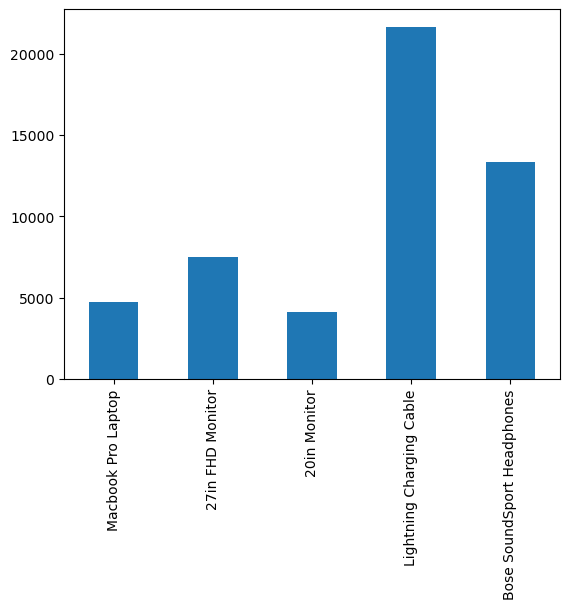

In [24]:
Sales['Product'].value_counts().sample(5).plot.bar()

<Axes: >

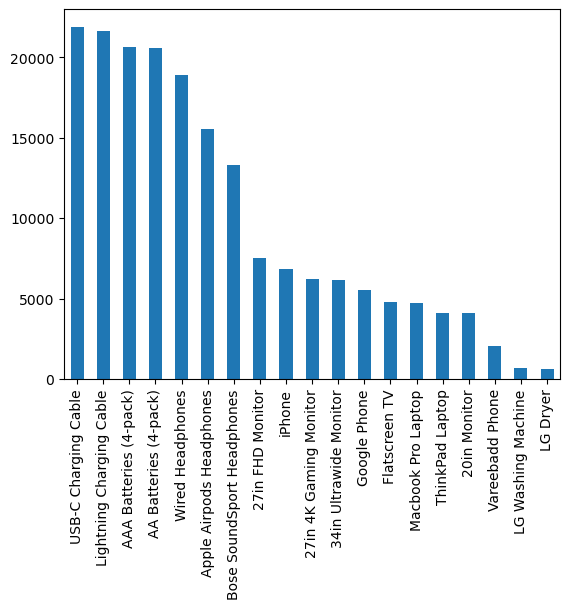

In [25]:
Sales['Product'].value_counts().plot.bar()

<Axes: >

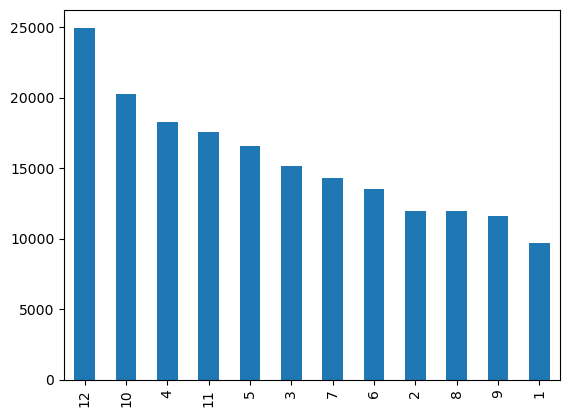

In [26]:
Sales['Month'].value_counts().plot.bar()

<Axes: >

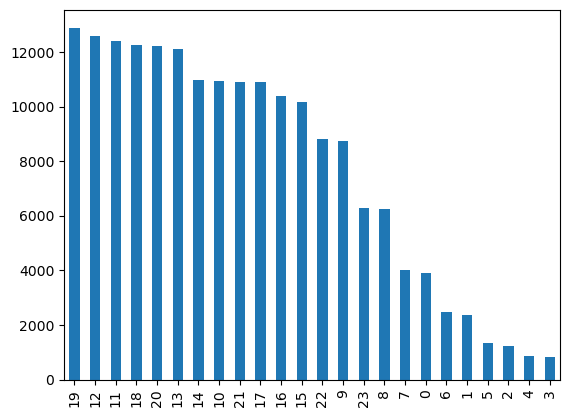

In [27]:
Sales['Hour'].value_counts().plot.bar()

Text(0.5, 1.0, '')

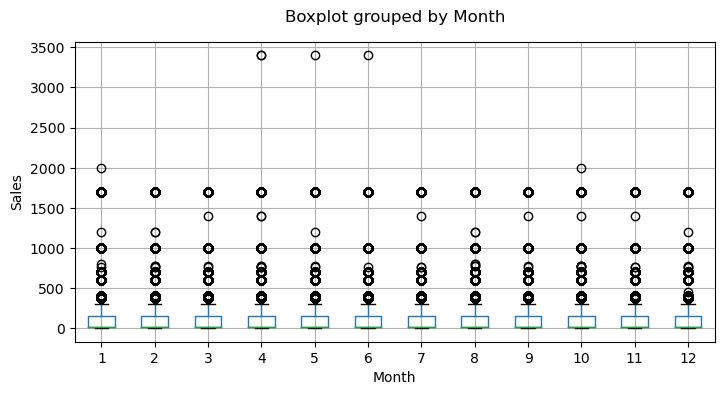

In [28]:
##here to find if there are outlier values

ax = Sales.boxplot(column='Sales', by='Month', figsize=(8,4))
ax.set_ylabel('Sales')
ax.set_title('')

In [29]:
## The most expensive selling products
Sales[Sales['Sales']== Sales['Sales'].max()]

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Gross profit,Revenue,Profit_percentage
29683,4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.0,San Francisco,21,1700.0,3400.0,0.5
30183,5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.0,New York City,12,1700.0,3400.0,0.5
89114,6776,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,3400.0,Boston,13,1700.0,3400.0,0.5
172777,385,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0,San Francisco,9,1700.0,3400.0,0.5


In [30]:
Sales[Sales['Sales']== Sales['Sales'].min()]

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Gross profit,Revenue,Profit_percentage
50,50,295710,AAA Batteries (4-pack),1,2.99,2019-12-26 19:09:00,"729 Pine St, Atlanta, GA 30301",12,2.99,Atlanta,19,0.0,2.99,0.0
75,75,295734,AAA Batteries (4-pack),1,2.99,2019-12-25 12:38:00,"453 Jackson St, Portland, OR 97035",12,2.99,Portland,12,0.0,2.99,0.0
82,82,295738,AAA Batteries (4-pack),1,2.99,2019-12-20 18:19:00,"829 7th St, Dallas, TX 75001",12,2.99,Dallas,18,0.0,2.99,0.0
95,95,295751,AAA Batteries (4-pack),1,2.99,2019-12-29 11:03:00,"922 Hickory St, Los Angeles, CA 90001",12,2.99,Los Angeles,11,0.0,2.99,0.0
113,113,295767,AAA Batteries (4-pack),1,2.99,2019-12-21 13:00:00,"891 7th St, New York City, NY 10001",12,2.99,New York City,13,0.0,2.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185929,13601,222890,AAA Batteries (4-pack),1,2.99,2019-06-24 07:54:00,"665 South St, San Francisco, CA 94016",6,2.99,San Francisco,7,0.0,2.99,0.0
185938,13610,222899,AAA Batteries (4-pack),1,2.99,2019-06-18 16:34:00,"688 1st St, New York City, NY 10001",6,2.99,New York City,16,0.0,2.99,0.0
185940,13612,222901,AAA Batteries (4-pack),1,2.99,2019-06-11 04:00:00,"891 South St, Atlanta, GA 30301",6,2.99,Atlanta,4,0.0,2.99,0.0
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,0.0,2.99,0.0


In [31]:
Sales['City'].unique()

array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

In [32]:
## Number of products in each city
Sales['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

<Axes: >

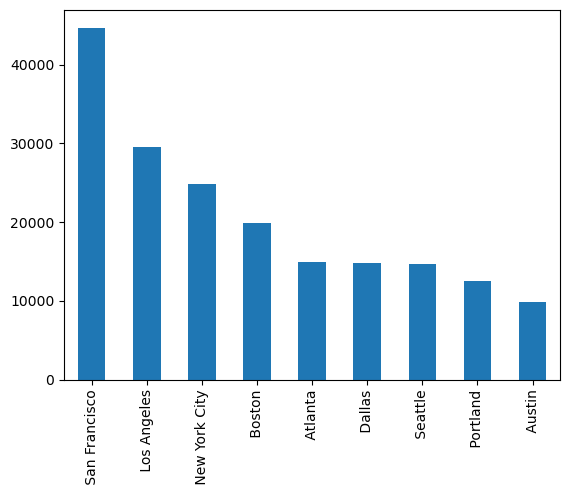

In [33]:
Sales['City'].value_counts().plot.bar()

In [34]:
##fig, ax=plt.subplots(figsize=(40,10))
#ax.scatter(Sales['Product'], Sales['Sales'])
#ax.set_ylabel('Sales')
#ax.set_xlabel('Project')

In [35]:
#fig, ax=plt.subplots(figsize=(16,8))
#ax.scatter(Sales['Month'], Sales['Sales'])
#ax.set_ylabel('Sales')
#ax.set_xlabel('Month')

In [36]:
## get the Quarter year to get more information in the visualization
Sales['Quarter'] = Sales['Order Date'].dt.to_period('Q')

In [37]:
Sales

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Gross profit,Revenue,Profit_percentage,Quarter
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,0.0,1700.00,0.0,2019Q4
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,0.0,600.00,0.0,2019Q4
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,0.0,11.95,0.0,2019Q4
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,0.0,149.99,0.0,2019Q4
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,0.0,11.95,0.0,2019Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,0.0,2.99,0.0,2019Q2
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,0.0,149.99,0.0,2019Q2
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,0.0,11.95,0.0,2019Q2
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,0.0,11.95,0.0,2019Q2


In [38]:
Sales.to_csv('Sales.csv')

# Done